In [1]:
# import packages
from src.models import train_model
import os
import librosa as lr
import pandas as pd
import glob

In [2]:
# train_dir = '/Users/girishhanumantha/Documents/GitHub/audio_anomaly_detection/data/external/CleanSim'
aafolder='SimNoise'
aapp='whitenoise'
base_dir='/Users/langchenfan/Documents/Radio Anomaly Detection/'
train_dir = base_dir+aafolder
cleanwav = glob.glob(os.path.join(train_dir,'*_inf.wav'))
sr_ = 44100

In [3]:
# create features and append to a DataFrame
df_train = pd.DataFrame()
for audio_file in cleanwav:
    print(audio_file)
    audio_ts, sr= lr.load(audio_file, sr=sr_)
    df_temp = train_model.extract_features_autoencoder(audio_ts=audio_ts, sr=sr)
    df_temp['audio_file'] = audio_file
    df_temp['audio_idx'] = df_temp.index.values
    df_train = pd.concat([df_train, df_temp ], axis=0)

/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/FOXS_439_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/FOXS_429_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KDMX_539_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KDMX_529_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KEGL_147_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KEGL_157_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KEGL_359_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KEGL_349_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KDMX_49_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KDMX_59_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KEGL_9_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/FOXS_349_inf.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/Sim

In [4]:
df_train.to_pickle(aapp+'_train_data.pkl')

In [5]:
# df_train = pd.read_pickle('train_data.pkl')

In [6]:
id_cols = ['audio_file', 'audio_idx']
feature_cols = list(set(df_train.columns) - set(id_cols))

In [7]:
df_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_633,feature_634,feature_635,feature_636,feature_637,feature_638,feature_639,feature_640,audio_file,audio_idx
4,0.156479,1.672886,5.182564,5.551458,3.699408,6.156624,5.895339,1.320014,0.703868,0.789639,...,5.350410e-09,1.049699e-09,2.925657e-10,3.009140e-10,2.536475e-10,4.081990e-10,3.773988e-10,1.402298e-11,/Users/langchenfan/Documents/Radio Anomaly Det...,4
5,0.107535,2.537602,17.305208,11.643184,2.006175,18.889177,23.068369,0.945396,0.755706,5.202226,...,6.675677e-09,1.341658e-09,3.873960e-10,4.688402e-10,2.833254e-10,3.745491e-10,4.072206e-10,2.000033e-11,/Users/langchenfan/Documents/Radio Anomaly Det...,5
6,0.009574,4.011597,26.132801,13.529487,0.845595,25.513981,52.980659,4.086813,0.734454,13.342801,...,3.972076e-09,8.665728e-10,2.834988e-10,2.845454e-10,2.242422e-10,2.816106e-10,3.162146e-10,1.857806e-11,/Users/langchenfan/Documents/Radio Anomaly Det...,6
7,0.018439,4.316293,36.117489,24.909208,1.885569,14.894025,99.801865,37.618896,2.200423,11.534718,...,3.114539e-10,2.543861e-10,1.334667e-10,6.682423e-11,1.222451e-10,1.419644e-10,1.325815e-10,1.061936e-11,/Users/langchenfan/Documents/Radio Anomaly Det...,7
8,0.012057,2.668234,43.239403,51.614162,4.751110,3.998047,100.892738,132.501617,23.784758,6.126424,...,3.561753e-11,2.816698e-11,7.230779e-11,5.338713e-12,6.697259e-11,6.009226e-11,2.972199e-11,5.009898e-12,/Users/langchenfan/Documents/Radio Anomaly Det...,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,0.000899,0.002112,0.005277,0.009001,0.030598,0.028017,0.023791,0.032156,0.056175,0.062818,...,4.473786e-10,3.132754e-13,2.721248e-13,1.875032e-13,4.116247e-13,1.232804e-13,1.878232e-13,1.293975e-13,/Users/langchenfan/Documents/Radio Anomaly Det...,857
858,0.002003,0.002986,0.001380,0.003409,0.043919,0.055687,0.026087,0.098010,0.222408,0.057463,...,2.566267e-10,7.964242e-14,8.259779e-14,4.135196e-14,6.962612e-14,5.363387e-14,8.299074e-14,4.611510e-14,/Users/langchenfan/Documents/Radio Anomaly Det...,858
859,0.000901,0.002311,0.003125,0.007483,0.059777,0.084669,0.069214,0.089946,0.172204,0.074682,...,7.937940e-10,6.005446e-14,7.140828e-14,7.361166e-14,4.197292e-14,5.780236e-14,5.332722e-14,5.198192e-14,/Users/langchenfan/Documents/Radio Anomaly Det...,859
860,0.000875,0.000645,0.001701,0.015502,0.070006,0.027290,0.091497,0.046801,0.020903,0.015689,...,2.628095e-07,2.498753e-07,2.429229e-07,2.371534e-07,2.328058e-07,2.290468e-07,2.263846e-07,2.247680e-07,/Users/langchenfan/Documents/Radio Anomaly Det...,860


In [8]:
from sklearn.model_selection import train_test_split
VALIDATE_SIZE = 0.2
RANDOM_SEED = 42
# train // validate - no labels since they're all clean anyway
X_train, X_validate = train_test_split(df_train[feature_cols], test_size=VALIDATE_SIZE, random_state=RANDOM_SEED )

In [9]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

In [10]:
from sklearn.preprocessing import MinMaxScaler
pipeline.fit(X_train)
X_train_transformed = pd.DataFrame(pipeline.transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate_transformed = pd.DataFrame(pipeline.transform(X_validate), columns=X_validate.columns, index=X_validate.index)

In [11]:
import tensorflow as tf

# setup nn architecture

# data dimensions // hyperparameters
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([

    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),

    # reconstruction / decode
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')

])

# opt = tf.keras.optimizers.Adam(learning_rate=1e-03)
# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam",
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary();

Metal device set to: Apple M1 Pro


2022-11-30 15:25:09.883179: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-30 15:25:09.883358: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 640)               410240    
                                                                 
 dense_1 (Dense)             (None, 128)               82048     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 128)               4

In [12]:
# Callbacks
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath=aapp+'_autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    batch_size=BATCH_SIZE,
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]

In [13]:
# train model
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_validate_transformed, X_validate_transformed)
);

Epoch 1/100


2022-11-30 15:25:12.896939: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-30 15:25:13.362231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


869/869 [==============================] - ETA: 0s - loss: 7.1461e-04 - acc: 0.4708

2022-11-30 15:25:43.281856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


869/869 [==============================] - 34s 38ms/step - loss: 7.1461e-04 - acc: 0.4708 - val_loss: 5.6626e-04 - val_acc: 0.5262
Epoch 2/100
869/869 [==============================] - 30s 34ms/step - loss: 5.1281e-04 - acc: 0.5474 - val_loss: 4.6579e-04 - val_acc: 0.5738
Epoch 3/100
869/869 [==============================] - 28s 33ms/step - loss: 4.2949e-04 - acc: 0.5912 - val_loss: 4.0240e-04 - val_acc: 0.6130
Epoch 4/100
869/869 [==============================] - 31s 36ms/step - loss: 3.8447e-04 - acc: 0.6238 - val_loss: 3.7146e-04 - val_acc: 0.6330
Epoch 5/100
869/869 [==============================] - 31s 35ms/step - loss: 3.5974e-04 - acc: 0.6399 - val_loss: 3.5360e-04 - val_acc: 0.6468
Epoch 6/100
869/869 [==============================] - 29s 34ms/step - loss: 3.4274e-04 - acc: 0.6517 - val_loss: 3.3666e-04 - val_acc: 0.6574
Epoch 7/100
869/869 [==============================] - 28s 32ms/step - loss: 3.2922e-04 - acc: 0.6629 - val_loss: 3.2456e-04 - val_acc: 0.6679
Epoch 8/100

In [15]:
# load test data
test_dir = base_dir+aafolder
noisywav = glob.glob(os.path.join(test_dir,'*_'+aapp+'.wav'))

# create features and append to a DataFrame
df_test = pd.DataFrame()
for audio_file in noisywav:
    print(audio_file)
    sr_ = 44100
    audio_ts, sr= lr.load(audio_file, sr=sr_)
    df_temp = train_model.extract_features_autoencoder(audio_ts=audio_ts, sr=sr)
    df_temp['audio_file'] = audio_file
    df_temp['audio_idx'] = df_temp.index.values
    df_test = pd.concat([df_test, df_temp ], axis=0)

/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/FOXS_123_whitenoise.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KDMX_343_whitenoise.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KEGL_105_whitenoise.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KDMX_255_whitenoise.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/FOXS_65_whitenoise.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KDMX_185_whitenoise.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KDMX_25_whitenoise.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KEGL_463_whitenoise.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/FOXS_445_whitenoise.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KEGL_25_whitenoise.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimNoise/KDMX_465_whitenoise.wav
/Users/langchenfan/Documents/Radio Anomaly Detection/SimN

In [16]:
df_test.to_pickle(aapp+'_test_data.pkl')

In [17]:
#df_test = pd.read_pickle('test_data.pkl')

In [18]:
X_test = df_test[feature_cols]
X_test_transformed = pd.DataFrame(pipeline.transform(X_test), columns=X_test.columns, index=X_test.index)

In [19]:
reconstruct_train = autoencoder.predict(X_train_transformed)
reconstruct_test = autoencoder.predict(X_test_transformed)

  10/6950 [..............................] - ETA: 1:22

2022-11-30 15:37:24.537461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8688/8688 [==============================] - 81s 9ms/step


In [20]:
import numpy as np
mse_train = np.mean(np.power(X_train_transformed - reconstruct_train, 2), axis=1)
mse_test = np.mean(np.power(X_test_transformed - reconstruct_test, 2), axis=1)

In [21]:
mse_scaler = MinMaxScaler()
mse_train_transformed = pd.DataFrame(mse_scaler.fit_transform(pd.DataFrame(mse_train)), index=mse_train.index, columns=['MSE'])
mse_train_transformed['flag'] =0
mse_test_transformed = pd.DataFrame(mse_scaler.transform(pd.DataFrame(mse_test)), index = mse_test.index, columns=['MSE'])
mse_test_transformed['flag'] = 1

In [24]:
mse_merged = pd.concat([mse_train_transformed, mse_test_transformed])
mse_merged.sort_values(by=['MSE'], inplace=True)
mse_merged.reset_index(inplace=True)

1.0
4.469424724578857


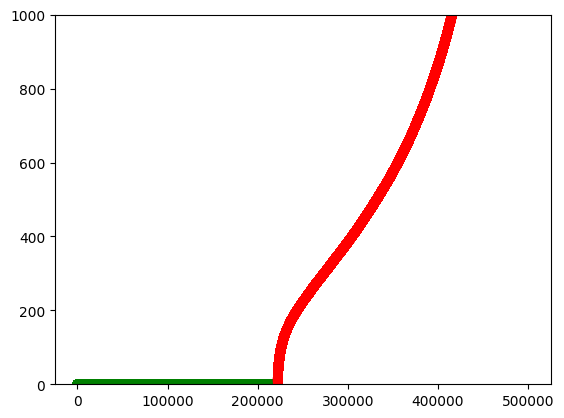

In [31]:
import matplotlib.pyplot as plt
plt.scatter(mse_merged.index, mse_merged['MSE'], c=mse_merged['flag'].apply(lambda x: 'green' if x==0 else 'red'))
ax=plt.gca()
ax.set(ylim=(0,1000))
print(max(mse_train_transformed['MSE']))
print(min(mse_test_transformed['MSE']))

In [35]:
import pickle
pickle.dump([pipeline,mse_scaler],open(aapp+'_dataprep.pkl','wb'))

In [ ]:
# import matplotlib.pyplot as plt
# ax = plt.gca()
# mse_train_transformed.plot(kind='hist',ax=ax, bins=10, alpha=0.01)
# # mse_test_transformed.plot(kind='hist', ax=ax,bins=10, alpha=0.01)

In [ ]:

# fig, ax = plt.subplots(figsize=(6,6))
# ax.hist(mse_train, bins=50, density=True, label="train", alpha=.6, color="green")
# ax.hist(mse_test, bins=50, density=True, label="test", alpha=.6, color="red")
# plt.show()

## Test with real data

In [4]:
from keras.models import load_model
import pickle
model = load_model(aapp+'_autoencoder_best_weights.hdf5')
model.summary()
[dataprep,msescaler]=pickle.load(open(aapp+'_dataprep.pkl','rb'))

2022-12-01 09:07:34.636527: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-01 09:07:34.636673: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 640)               410240    
                                                                 
 dense_1 (Dense)             (None, 128)               82048     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)      

In [ ]:
import pydub
import scipy.signal as signal
import numpy as np
import glob
import librosa as lr
import datetime
import re
import pydub

fpath = '/Users/langchenfan/Documents/Radio Anomaly Detection/WIOQ/'

time_format='%m-%d-%Y_%I-%M-%S_%p'
fs = 44100
dates = ['10-05-2022','10-06-2022','10-07-2022','10-08-2022','10-09-2022','10-10-2022','10-11-2022','10-12-2022','10-13-2022','10-14-2022','10-15-2022','10-16-2022','10-17-2022','10-18-2022']
prepost=2

for date in dates:
    fpath2=fpath+date+'/'
    wavlist = glob.glob(os.path.join(fpath2, '*.mp3'))
    df_all=pd.DataFrame()
    df_clean=pd.DataFrame()
    for audiofile in wavlist:
        print('Predicting ' + audiofile[len(fpath2):] + ' ......')
        wav, fs = lr.load(audiofile, sr=fs)

        df = train_model.extract_features_autoencoder(audio_ts=wav, sr=fs)
        df['audio_file'] = audiofile[len(fpath2):]
        id_cols = ['audio_file']
        feature_cols = list(set(df.columns) - set(id_cols))

        XX_test = df[feature_cols]
        XX_test_transformed = pd.DataFrame(dataprep.transform(XX_test), columns=XX_test.columns, index=XX_test.index)
        reconstruct_test = model.predict(XX_test_transformed)
        msetest = np.mean(np.power(XX_test_transformed - reconstruct_test, 2), axis=1)
        msetest_transformed = msescaler.transform(pd.DataFrame(msetest))
        timeframe=XX_test.index.map(float)*2048*5/fs

        dftemp=pd.DataFrame({'TimeFrame':timeframe,'mse_transformed':msetest_transformed[:,0]})
        dftemp['File']=audiofile[len(fpath2):]
        dftemp['pred']=dftemp['mse_transformed'].apply(lambda x: 1 if x>=5 else 0)
        df_all=pd.concat([df_all,dftemp])

        # save anomaly clip
        timestr=re.findall(r'[0-9]{2}-[0-9]{2}-[0-9]{4}_[0-9]{2}-[0-9]{2}-[0-9]{2}_[AP]{1}M', audiofile)[0]
        filets=datetime.datetime.strptime(timestr,time_format)

        dftemp_clean=dftemp[dftemp['pred']==1]

        if len(dftemp_clean)!=0:
            dftemp_clean['post_start']=dftemp_clean['TimeFrame'].shift(-1)
            dftemp_clean.reset_index(inplace=True,drop=True)

            lst = dftemp_clean.loc[0,'TimeFrame']
            let = 0
            startflag=1
            count=0
            for idx,row in dftemp_clean.iterrows():
                count+=1
                if startflag==1:
                    lst = row.TimeFrame
                    startflag=0

                if (row['post_start']>=row['TimeFrame']+2) or np.isnan(row['post_start']):
                                                        # if next start time is within 2 sec of current ending time, consider current and next as one event and continue counting
                    let = row.TimeFrame+0.5
                    if count>=3: # only save audio clips with at least 5 identified interruptions (i.e. consider as substantial anomaly events)
                        # save the audio clip and info
                        lst_fn=filets+datetime.timedelta(seconds=round(lst,2))
                        fn = os.path.join(fpath,'pred_noise_autoencoder',row.File[:8]+lst_fn.strftime(time_format)+'.mp3')
                        savewav = wav[np.max([0,round((lst-prepost)*fs)]):np.min([len(wav),round((let+prepost)*fs)])]
                        savewav = np.multiply(savewav,(2 ** 31 - 1)).astype(np.int32)
                        pydub.AudioSegment(savewav.tobytes(), frame_rate=fs, sample_width=4, channels=1).export(fn, format="mp3")

                        newdfrow=pd.DataFrame({'File':row.File,'TimeStart':lst,'TimeStamp':let,'Prediction':1,'count':count},index=[0])
                        df_clean=pd.concat([df_clean,newdfrow],ignore_index=True)

                        startflag=1
                        count=0


        df_all.to_csv(fpath + 'pred_noise_autoencoder/iden_noise_autoencoder_' + audiofile[len(fpath2) + 8:len(fpath2) + 13] + '_raw.csv', index=False)
        df_clean.to_csv(fpath + 'pred_noise_autoencoder/iden_noise_autoencoder_' + audiofile[len(fpath2) + 8:len(fpath2) + 13] + '_clean.csv', index=False)

Predicting WIOQ-FM_10-05-2022_03-00-00_PM_65776.mp3 ......


/Users/langchenfan/audio_anomaly_detection2/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


14535/14535 [==============================] - 135s 9ms/step


/var/folders/_l/yljdbk6x7g17h77d_0hz8lw40000gp/T/ipykernel_45205/839893334.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp_clean['post_start']=dftemp_clean['TimeFrame'].shift(-1)


Predicting WIOQ-FM_10-05-2022_10-30-00_PM_65786.mp3 ......


/Users/langchenfan/audio_anomaly_detection2/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


14535/14535 [==============================] - 136s 9ms/step


/var/folders/_l/yljdbk6x7g17h77d_0hz8lw40000gp/T/ipykernel_45205/839893334.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp_clean['post_start']=dftemp_clean['TimeFrame'].shift(-1)


Predicting WIOQ-FM_10-05-2022_01-30-00_PM_65775.mp3 ......


/Users/langchenfan/audio_anomaly_detection2/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


14535/14535 [==============================] - 120s 8ms/step


/var/folders/_l/yljdbk6x7g17h77d_0hz8lw40000gp/T/ipykernel_45205/839893334.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp_clean['post_start']=dftemp_clean['TimeFrame'].shift(-1)


Predicting WIOQ-FM_10-05-2022_09-00-00_PM_65783.mp3 ......


/Users/langchenfan/audio_anomaly_detection2/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


14535/14535 [==============================] - 137s 9ms/step


/var/folders/_l/yljdbk6x7g17h77d_0hz8lw40000gp/T/ipykernel_45205/839893334.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp_clean['post_start']=dftemp_clean['TimeFrame'].shift(-1)
